# ML LAB - TASK-1
### TOPIC - DATA CLEANING
- Data Cleaning is a process of cleaning data, preparing and preprocessing the dataset before it goes through the Machine Learning algorithm. A well prepared and clean dataset will give better accuracy than inconsistent data. It includes the following processes:
1. Handling Missing Values.
2. Handling Categorial Data.
3. Dealing with inconsistent Data Entry.
4. Handling Dates and Times
5. Scaling and Normalisation
- The dataset is extracted from kaggle and the link for the same is (https://www.kaggle.com/shrutibhargava94/india-air-quality-data)

In [1]:
#importing libraries
import numpy as np            
import pandas as pd

In [2]:
#import dataset
df = pd.read_csv('data.csv',low_memory=False)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
shape = df.shape
print(shape)
print("The numer of rows in the dataset are :",shape[0])

(435742, 13)
The numer of rows in the dataset are : 435742


In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
#statistical description of the dataset
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


The dataset contains a lot of missing values.

### 1. Missing Values
The values may be missing because:
1. either they are not recorded or
2. the value doesn't exist.
If the value exists and is not recorded, then we need to fill the missing data either by guessing the value that would have been there (**Imputation**), by filling it with a random value or by applying statistical method.

In [6]:
#checking the null values in each coloumn
miss = df.isna().sum()
miss

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

**STEPS TO HANDLE MISSING VALUES**
- Look through the description of each column and figure out whether the data is not recorded or data for that field does'nt exist.
- If data is not recorded apply any method to fill the value.
- Drop the rest.

In [7]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
#missing values percentage
total_cells = shape[0]*shape[1]
missing_values = miss.sum()
missing_percentage = (missing_values/total_cells)*100
print(missing_percentage)

19.089824854015593


19% of the values in the dataset are missing or NaN

In [9]:
#dropping location mnitoring station
df.drop(columns='location_monitoring_station',axis=1,inplace=True)

In [10]:
#filling the values for so2,no2,rspm,spm,pm2-5 as 0 as there doesnt exist any of these chemical.
values = {'so2':0,'no2':0,'pm2_5':0,'rspm':0,'spm':0}
df.fillna(value=values,inplace=True)

In [11]:
#filling values for stn_code,sampling_date,location,type
df.fillna(method='ffill',axis=0,inplace=True)

In [12]:
#filling agency
#assuming all the missing agency data is by central agency
df['agency'].fillna("Central Agency",inplace=True)

In [13]:
#data cleaned
df.isna().sum()

stn_code         0
sampling_date    0
state            0
location         0
agency           0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5            0
date             0
dtype: int64

In [14]:
print("Data Cleaned with all the missing values")

Data Cleaned with all the missing values


### 2. Handling Categorial Data
- Categorial Data includes columns such as agency,state,location,etc.
- These include data that does not have numerical values or date-time values but categories.
- Examples include - Yes/No , True/False, Male/Female, etc.

In [15]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,Central Agency,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01


In the dataset, there is no missing categorial data or inconsistent data category.
- Inconsistent data entry includes (1 - Male, 0- Female) : numbers denoting the categories.
However, the **dtype** of the categorial data must be **category**

In [16]:
df.dtypes

stn_code          object
sampling_date     object
state             object
location          object
agency            object
type              object
so2              float64
no2              float64
rspm             float64
spm              float64
pm2_5            float64
date              object
dtype: object

In [17]:
#chanfging the dtype of categorial data
df = df.astype({'state':'category','location':'category','agency':'category','type':'category'})

In [18]:
df.dtypes

stn_code           object
sampling_date      object
state            category
location         category
agency           category
type             category
so2               float64
no2               float64
rspm              float64
spm               float64
pm2_5             float64
date               object
dtype: object

dtype changes to **category**.

### 3. Dealing with Inconsistent Data Entry.
- Deals with the inconsistency in data like duplicates, lowercase and uppercase, etc.
- In the given dataset, considering **state**, **location**,**types** and **agency** for data inconsistency.

In [19]:
df['state'].unique()

['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', ..., 'Uttaranchal', 'West Bengal', 'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura']
Length: 37
Categories (37, object): ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', ..., 'West Bengal', 'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura']

In [20]:
df['location'].unique()

['Hyderabad', 'Vishakhapatnam', 'Visakhapatnam', 'Tirupati', 'Vijayawada', ..., 'HALDIA', 'Kalyani', 'MALDAH', 'SILIGURI', 'ULUBERIA']
Length: 304
Categories (304, object): ['Hyderabad', 'Vishakhapatnam', 'Visakhapatnam', 'Tirupati', ..., 'Kalyani', 'MALDAH', 'SILIGURI', 'ULUBERIA']

In [21]:
df['agency'].unique()

['Central Agency', 'Andhra Pradesh  Pollution Control Board', 'Andhra Pradesh State Pollution Control Board', 'National Environmental Engineering Research I..., 'Arunachal Pradesh State Pollution Control Board', ..., 'UPPB', 'Uttarakhand Environment Protection and Pollut..., 'CMEC', 'West Bengal Pollution Control Board', 'West Bengal State Pollution Control Board']
Length: 65
Categories (65, object): ['Central Agency', 'Andhra Pradesh  Pollution Control Board', 'Andhra Pradesh State Pollution Control Board', 'National Environmental Engineering Research I..., ..., 'Uttarakhand Environment Protection and Pollut..., 'CMEC', 'West Bengal Pollution Control Board', 'West Bengal State Pollution Control Board']

In [22]:
df['type'].unique()

['Residential, Rural and other Areas', 'Industrial Area', 'Sensitive Area', 'Industrial Areas', 'Residential and others', 'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO', 'Sensitive']
Categories (10, object): ['Residential, Rural and other Areas', 'Industrial Area', 'Sensitive Area', 'Industrial Areas', ..., 'Industrial', 'Residential', 'RIRUO', 'Sensitive']

There is no discrepency or duplicates in the data. Thus, the data is consistent, no change needs to be done.

### 4. Handling Date and Time
- refers to the changes, extraction and modification done on date and time columns.
- The date time columns should be in datettime dtype format.

In [23]:
df.dtypes

stn_code           object
sampling_date      object
state            category
location         category
agency           category
type             category
so2               float64
no2               float64
rspm              float64
spm               float64
pm2_5             float64
date               object
dtype: object

In [24]:
#method-1 by using astype function to convert in the same format as it is written in.
df = df.astype({'date':'datetime64'})

In [25]:
#method-2 - creating a new col of datetime with the customised date-time format a per requirement
#converting in the format - DAY-MONTH-YEAR
df['parsed_date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')

In [26]:
df.dtypes

stn_code                 object
sampling_date            object
state                  category
location               category
agency                 category
type                   category
so2                     float64
no2                     float64
rspm                    float64
spm                     float64
pm2_5                   float64
date             datetime64[ns]
parsed_date      datetime64[ns]
dtype: object

In [27]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date,parsed_date
0,150,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,Central Agency,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,1990-03-01


It is prefferred to use the second method **pd.to_datetime** as it can convert any format into the YYYY-MM-DD format and is fast.

In [28]:
#extracting day of the month
day_of_month = df['parsed_date'].dt.day

In [29]:
#checking the distribution
import seaborn as sns

C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='parsed_date', ylabel='Density'>

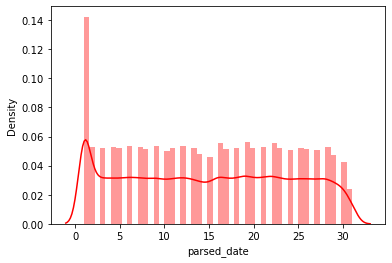

In [30]:
sns.distplot(day_of_month,color='red')

The range of day of month is 1-30. Hence, the distrbution is correct.

### 5. Scaling and Normalisation
- It refers to the changing of values of numerical variables like so2,no2,pm2_5,spm,etc. that contains numerical values.
- **Scaling** Refers to changing the range (scale) of the data (eg any distribution from 0-255 scale is changed to 0-1 scale)
- Scaling is often done when comparison of the coloumns is required. Eg- cuurency comparison.
- **Normalisation** refers to conversion of the data distribution to normal distribution, i.e, equal count before and after the mean of the distribution . (mean==median)
- Normalisation is often done when the ML algorithm requires data in normal distribution. (Gaussian Distribution)
- Box-Cox Transformation is used for normalisation.

In [31]:
from mlxtend.preprocessing import minmax_scaling      #for scaling
from scipy import stats                               #for normalisation
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date,parsed_date
0,150,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,Central Agency,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,Central Agency,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,1990-03-01


In [40]:
#scaling the values
scaled = minmax_scaling(df.iloc[:,6:11],columns=['so2','no2','rspm','spm','pm2_5'])
scaled

,so2,no2,rspm,spm,pm2_5
0,0.005281,0.019863,0.000000,0.0,0.0
1,0.003410,0.007991,0.000000,0.0,0.0
2,0.006821,0.032534,0.000000,0.0,0.0
3,0.006931,0.016781,0.000000,0.0,0.0
4,0.005171,0.008562,0.000000,0.0,0.0
...,...,...,...,...,...
435737,0.024202,0.057078,0.022673,0.0,0.0
435738,0.022002,0.052511,0.027113,0.0,0.0
435739,0.000000,0.000000,0.000000,0.0,0.0
435740,0.000000,0.000000,0.000000,0.0,0.0


Thus the range of values is converted between 0-1.

In [41]:
print("DATA CLEANED")

DATA CLEANED


# END